<a href="https://colab.research.google.com/github/ashutoshrabia/Predicting-closing-stock-price-of-Apple/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What was the change in price of the stock overtime?

In [56]:
import pandas as pd
import numpy as np
!pip install yfinance
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
#from pandas.util.testing import assert_frame_equal

# For time stamps
from datetime import datetime

In [57]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    # Set DataFrame as the Stock Ticker
    globals()[stock] =yf.download(stock, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [58]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.sort_index(inplace=True)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200,APPLE
2024-07-02,183.470001,186.949997,183.059998,186.610001,186.610001,12555500,GOOGLE
2024-07-03,458.190002,461.019989,457.880005,460.769989,460.769989,9932800,MICROSOFT
2024-07-03,199.940002,200.029999,196.759995,197.589996,197.589996,31597900,AMAZON
2024-07-03,186.300003,187.619995,185.384995,187.389999,187.389999,7409100,GOOGLE
2024-07-03,220.000000,221.550003,219.029999,221.550003,221.550003,37369800,APPLE
2024-07-05,187.350006,192.208694,187.345001,191.929993,191.929993,9306784,GOOGLE
2024-07-05,221.649994,225.639999,221.649994,225.315002,225.315002,41474078,APPLE
2024-07-05,459.660004,468.350006,458.964996,467.209991,467.209991,9723020,MICROSOFT


In [11]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,184.548696,186.162925,183.091779,184.652886,184.189918,6.024888e+07
std,11.559106,11.770090,11.460892,11.666543,11.723659,2.472730e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.309998,177.080002,173.740005,175.460007,174.802902,4.677800e+07
50%,183.919998,185.149994,182.110001,184.119995,183.610962,5.366560e+07
75%,191.490005,192.729996,190.270004,191.559998,191.039993,6.613340e+07
max,221.649994,225.639999,221.649994,225.270004,225.270004,2.464214e+08


In [12]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-07-05 to 2024-07-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


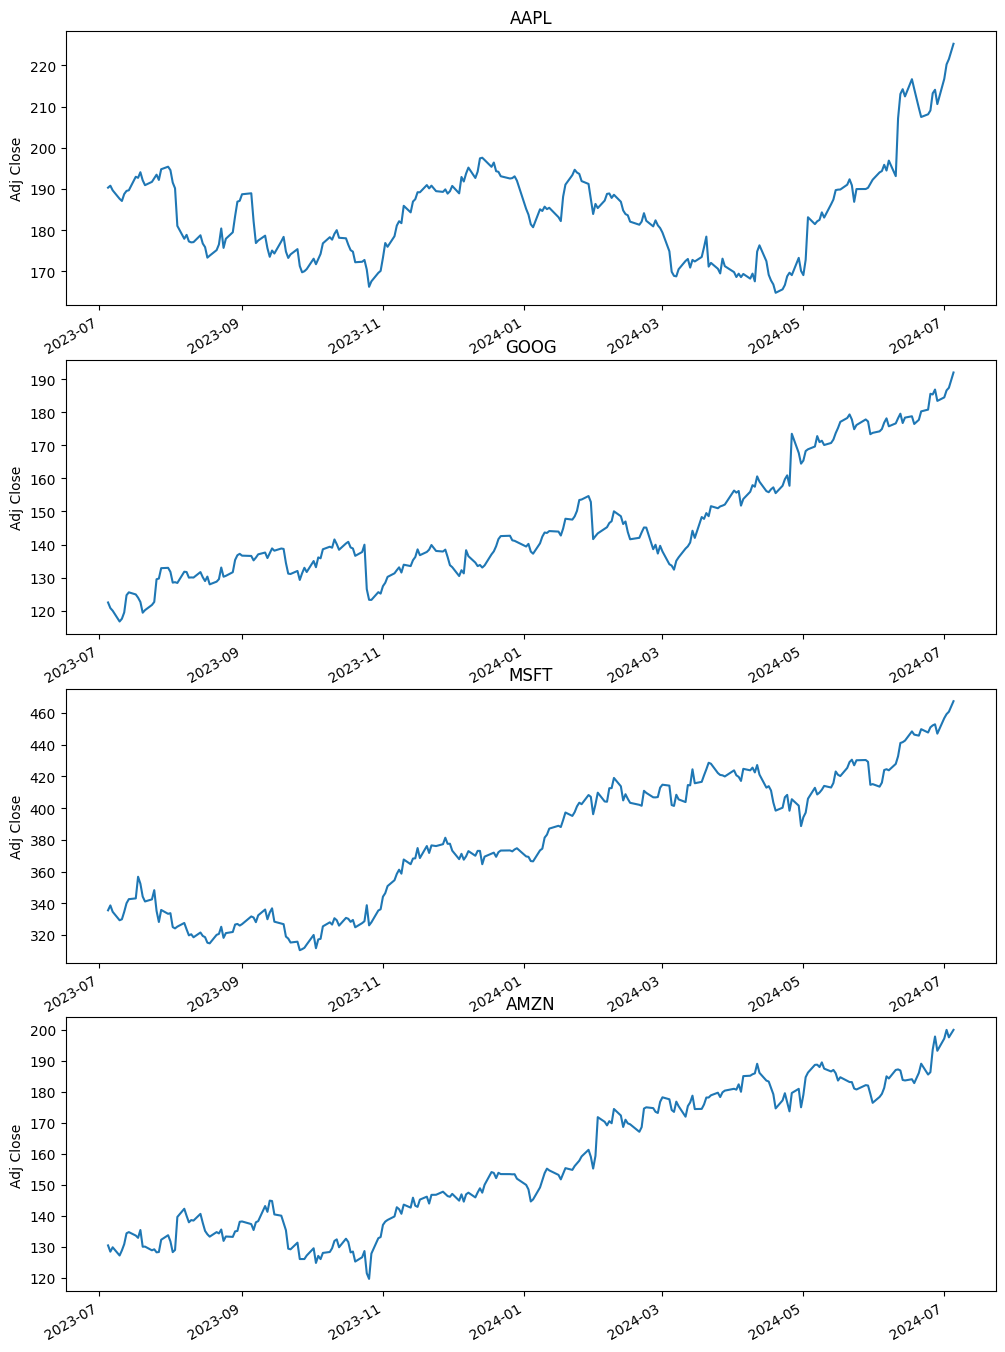

In [13]:
# Let's see a historical view of the closing price

plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

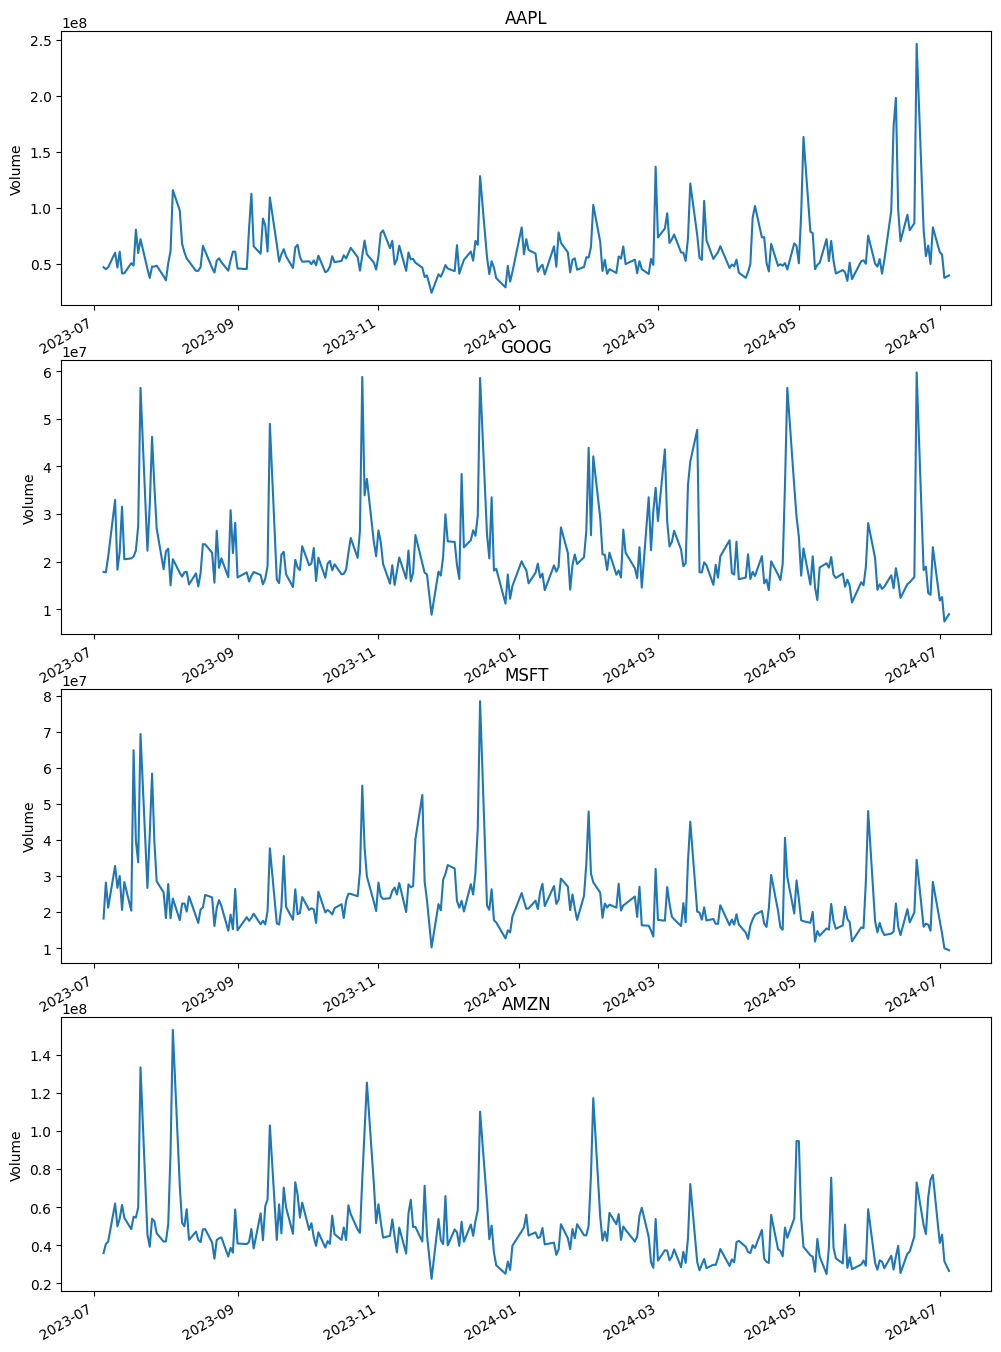

In [14]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## What was the moving average of the various stocks?

In [15]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [16]:
print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


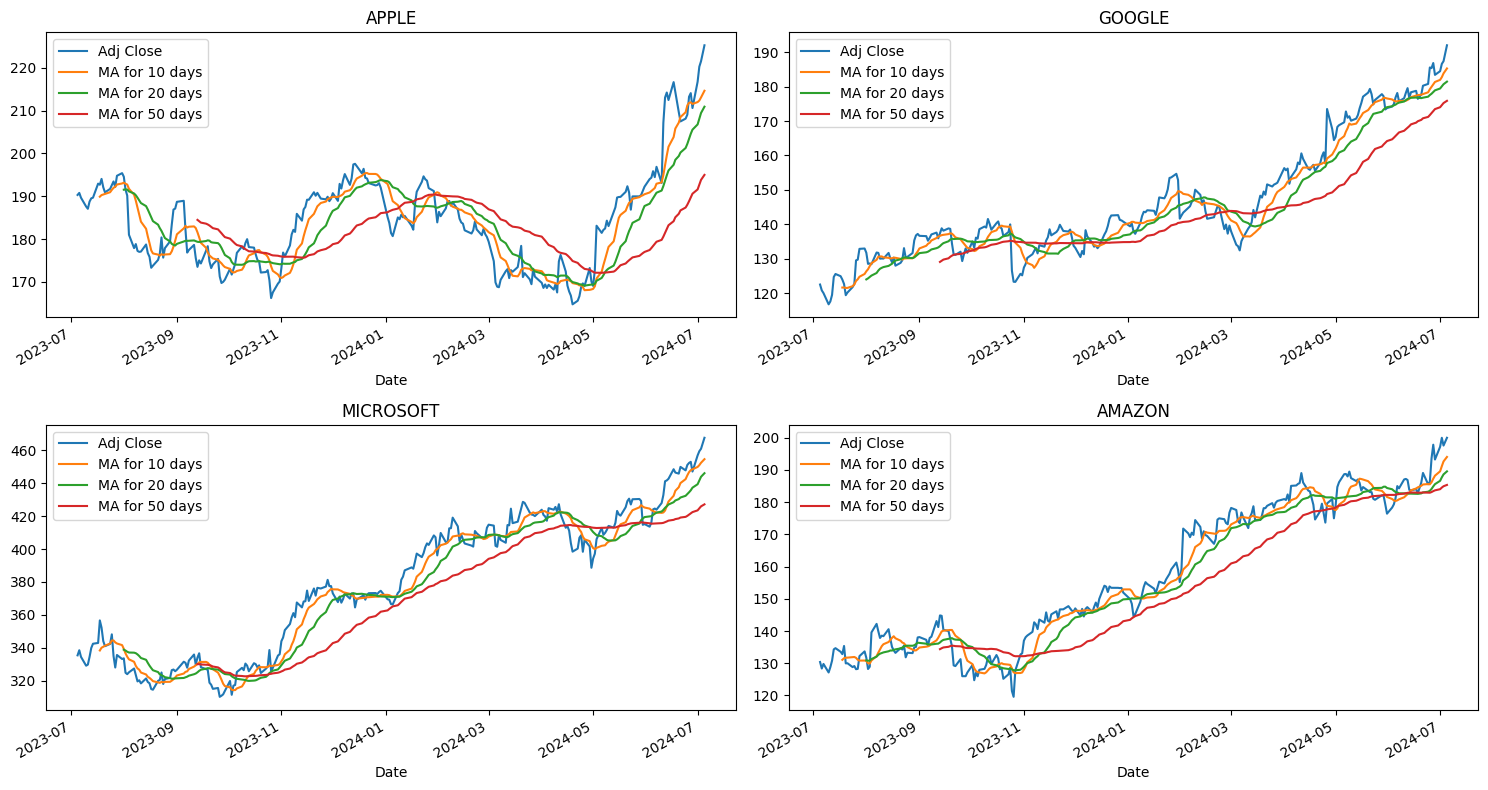

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## What was the daily return of the stock on average?

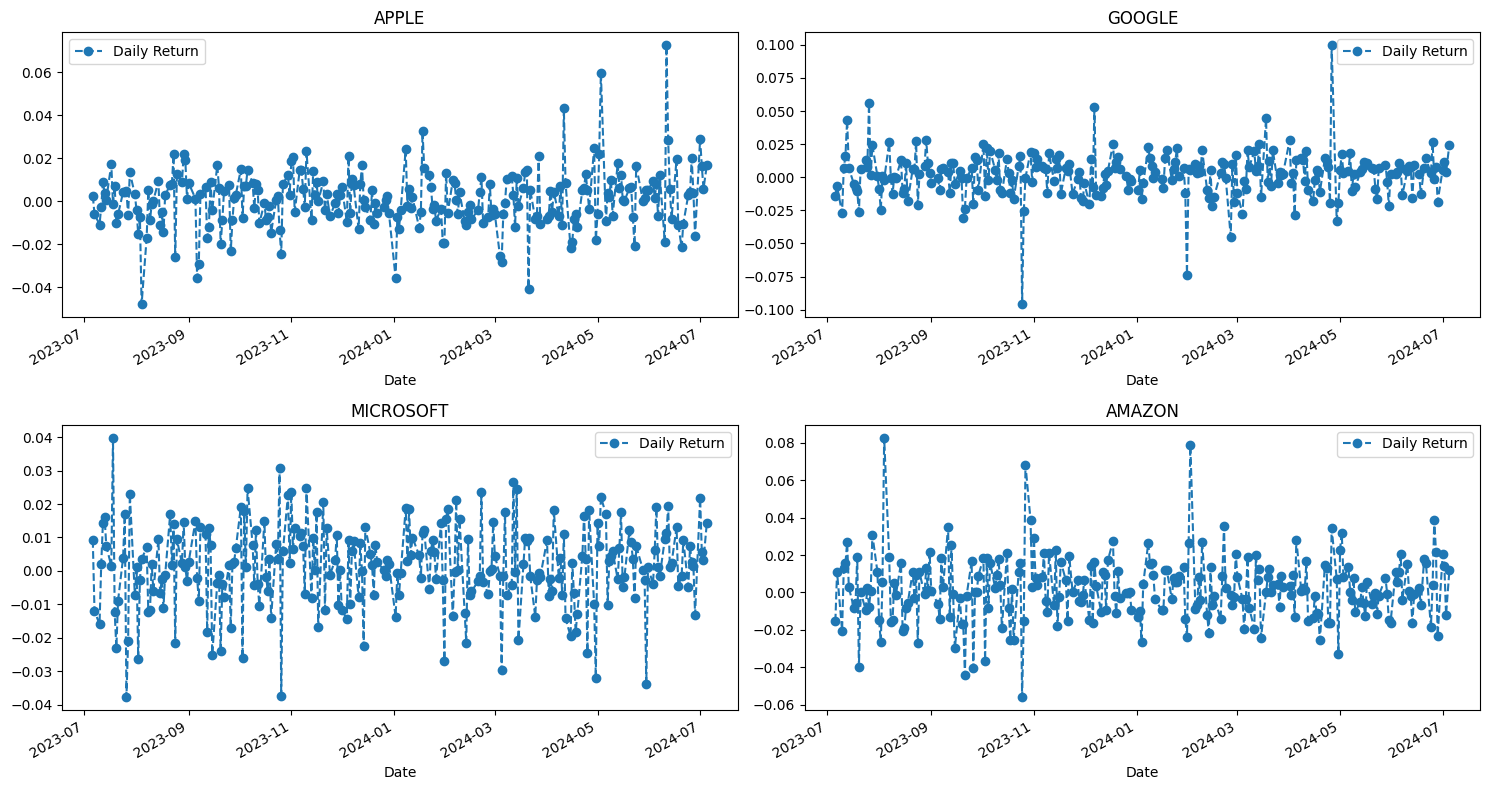

In [18]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

<ipython-input-20-ed740d52067d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100)
<ipython-input-20-ed740d52067d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100)
<ipython-input-20-ed740d52067d>:6: UserWarning

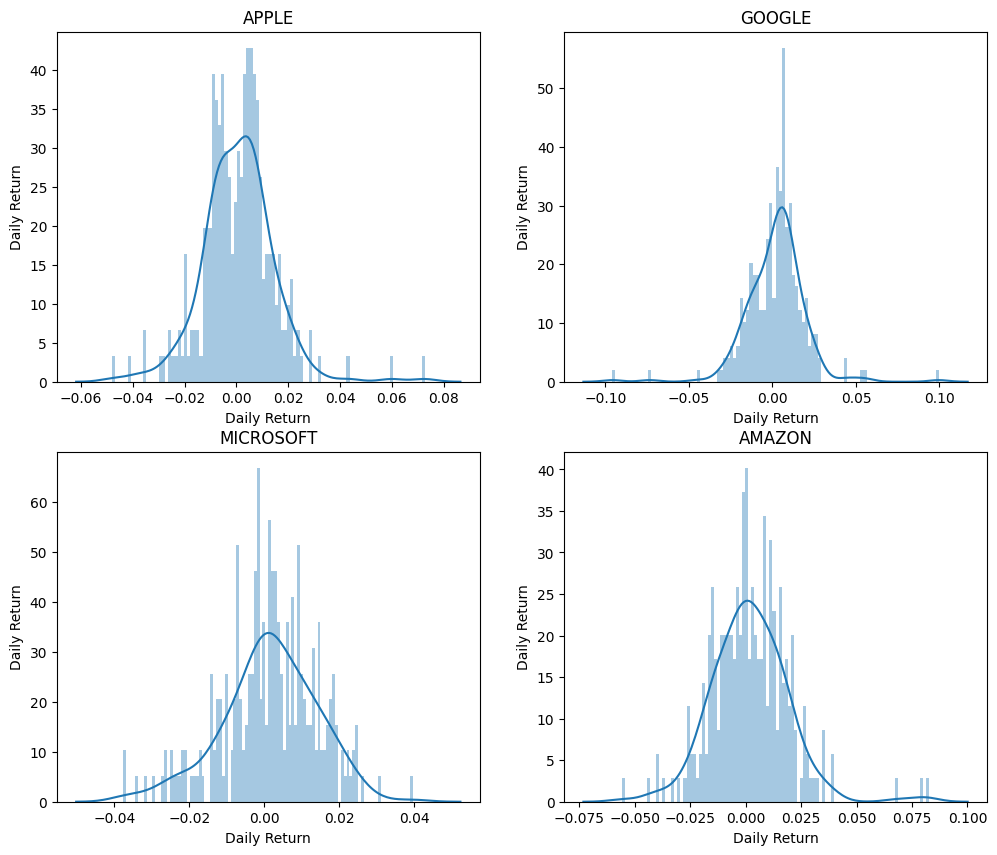

In [20]:

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

## What was the correlation between different stocks closing prices?

In [24]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df =yf.download(tech_list, start=start, end=end) ['Adj Close']

# Let's take a quick look
closing_df.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-05,190.319260,130.380005,122.490608,335.525299
2023-07-06,190.796722,128.360001,120.792542,338.621033
2023-07-07,189.672668,129.779999,120.003441,334.602478
2023-07-10,187.613647,127.129997,116.737160,329.254333
2023-07-11,187.086426,128.779999,117.576202,329.889374


In [25]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-05,NaN,NaN,NaN,NaN
2023-07-06,0.002509,-0.015493,-0.013863,0.009227
2023-07-07,-0.005891,0.011063,-0.006533,-0.011867
2023-07-10,-0.010856,-0.020419,-0.027218,-0.015984
2023-07-11,-0.002810,0.012979,0.007187,0.001929


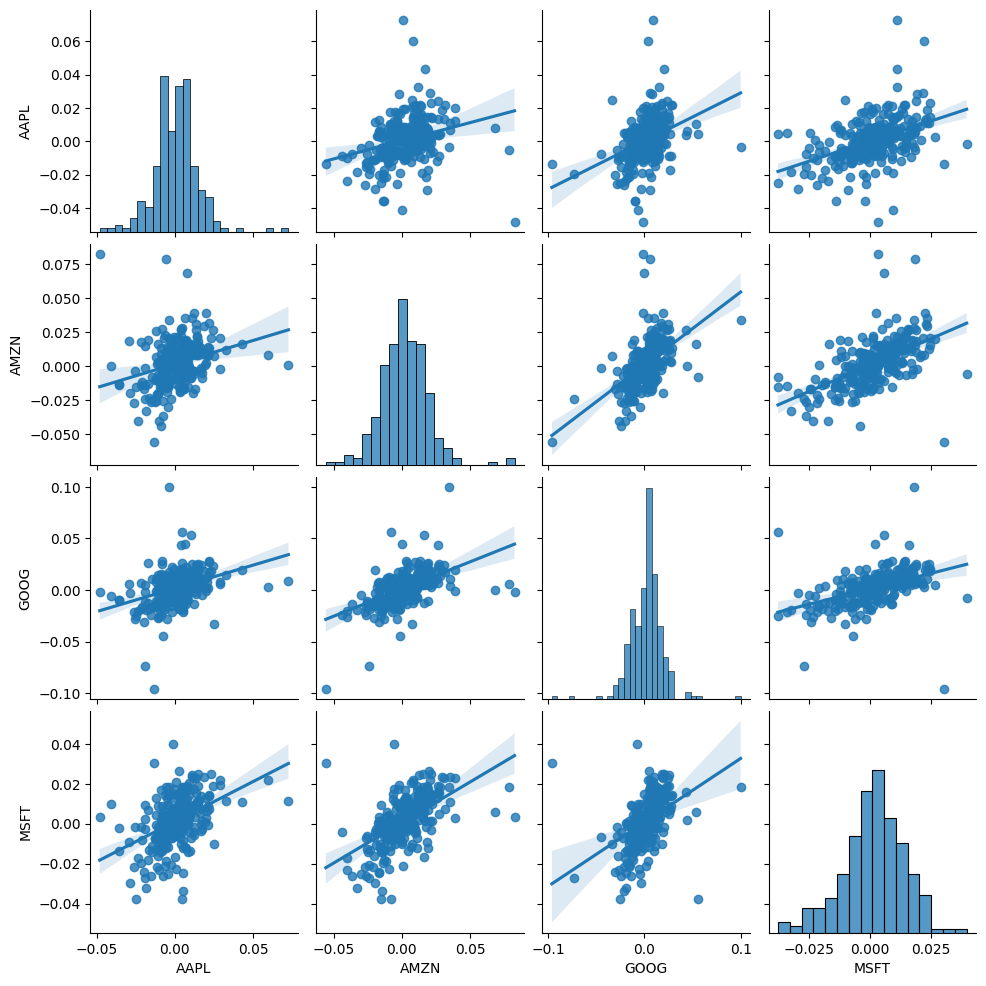

In [27]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

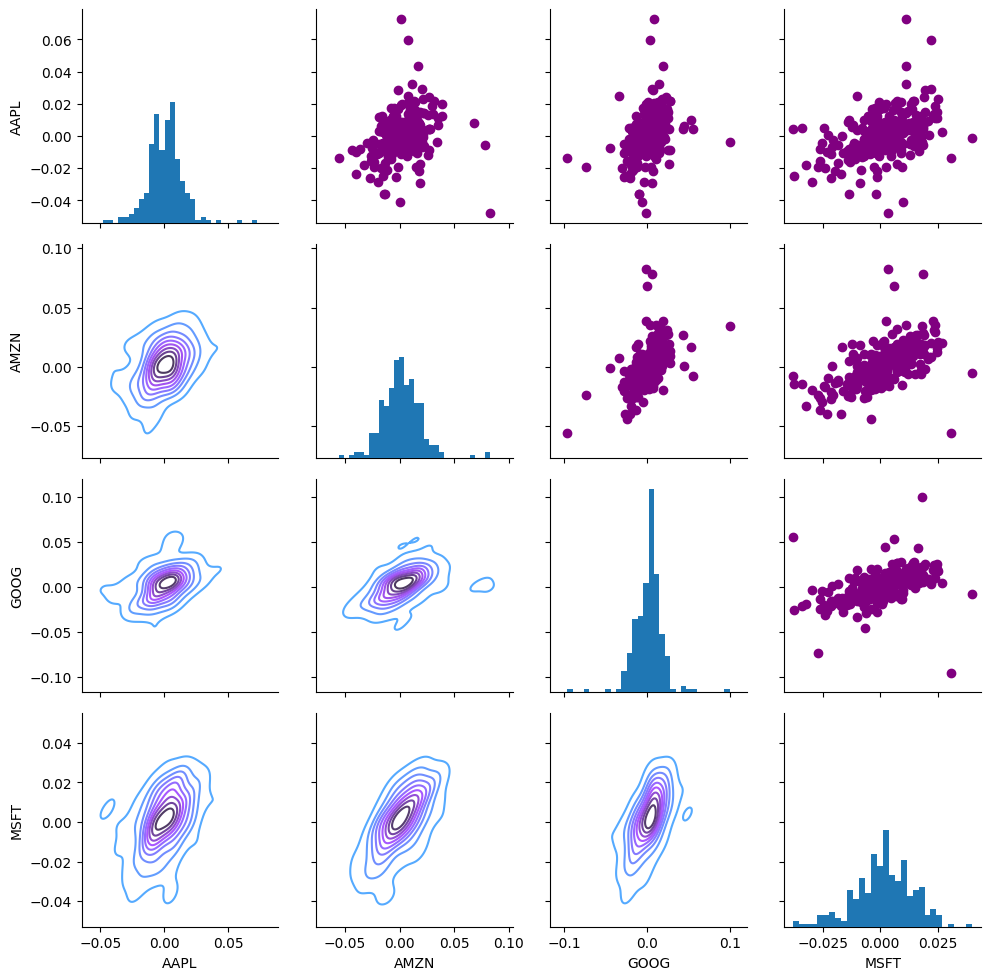

In [28]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

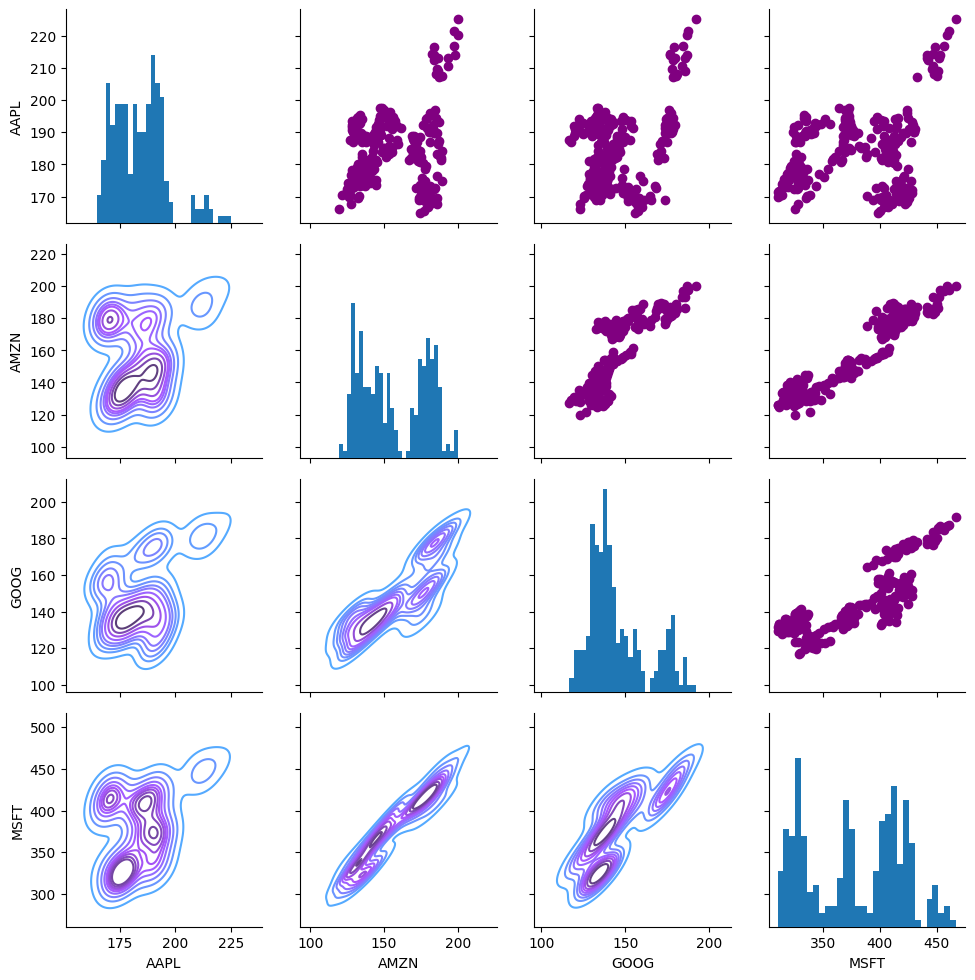

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

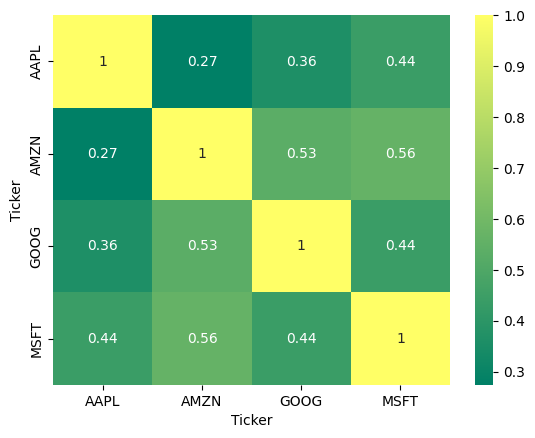

In [30]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: xlabel='Ticker', ylabel='Ticker'>

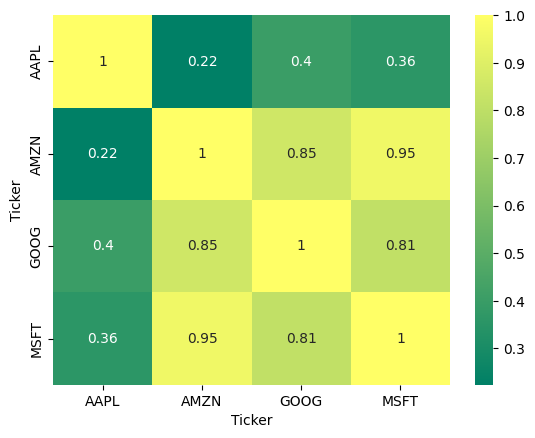

In [31]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## How much value do we put at risk by investing in a particular stock?

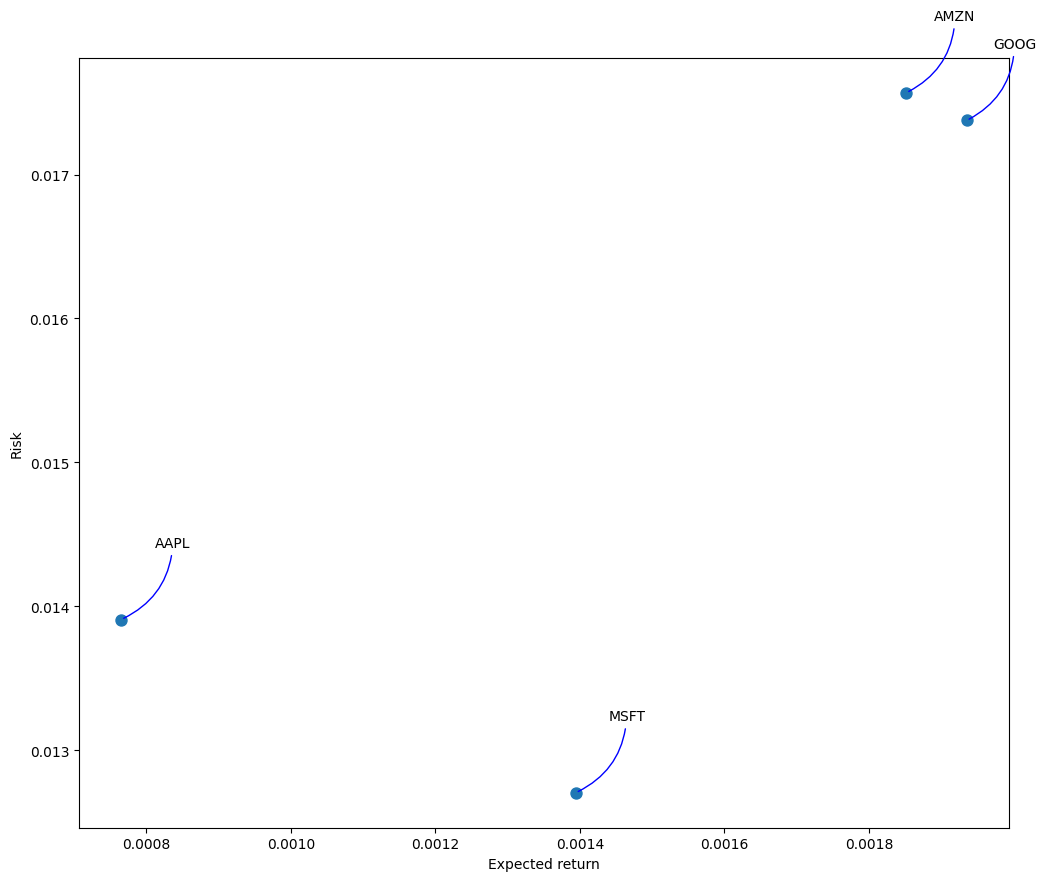

In [32]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the closing price stock price of APPLE inc:

In [39]:
#Get the stock quote
df= yf.download('AAPL', start='2016-01-01', end=end)
#Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.914484,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.315203,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.858929,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.894176,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.009947,283192000
...,...,...,...,...,...,...
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900
2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200


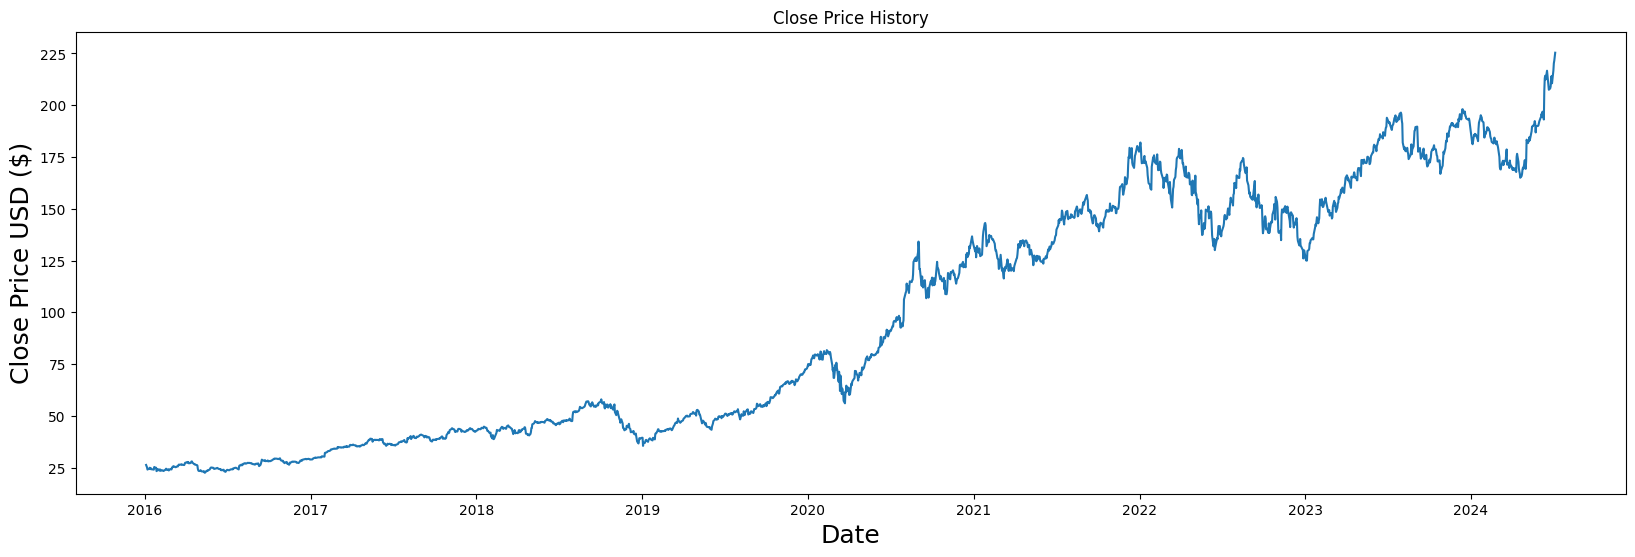

In [40]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [41]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1712

In [42]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01850528],
       [0.01525052],
       [0.01277246],
       ...,
       [0.97487424],
       [0.9811865 ],
       [1.        ]])

In [43]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01850528, 0.01525052, 0.01277246, 0.00753279, 0.00816156,
       0.01009715, 0.01186015, 0.00869169, 0.01131768, 0.00837114,
       0.0077917 , 0.00795197, 0.00734787, 0.01366013, 0.01121906,
       0.01189713, 0.00379722, 0.00462324, 0.00863004, 0.00750814,
       0.00510406, 0.00740951, 0.00771773, 0.00453694, 0.00575748,
       0.00573282, 0.00484515, 0.00414242, 0.00449995, 0.00776704,
       0.00959168, 0.00729856, 0.00702733, 0.00806293, 0.00536296,
       0.00710129, 0.00791499, 0.00809992, 0.00782869, 0.01256288,
       0.01283411, 0.01375876, 0.01562038, 0.01421492, 0.01317931,
       0.01329027, 0.01335191, 0.01469574, 0.01501627, 0.01755598,
       0.01926966, 0.01906007, 0.01920801, 0.01919569, 0.0201943 ,
       0.01946691, 0.01889979, 0.01830803, 0.02137785, 0.02369563])]
[0.022992899862488037]

[array([0.01850528, 0.01525052, 0.01277246, 0.00753279, 0.00816156,
       0.01009715, 0.01186015, 0.00869169, 0.01131768, 0.00837114,
       0.0077917 , 0.00795197, 0.0

In [44]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1652, 60, 1)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [47]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1652/1652 [==============================] - 66s 36ms/step - loss: 0.0012


In [49]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [50]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [51]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [52]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 1s 15ms/step


In [53]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.168379965447189

<ipython-input-54-c4aee32f125a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


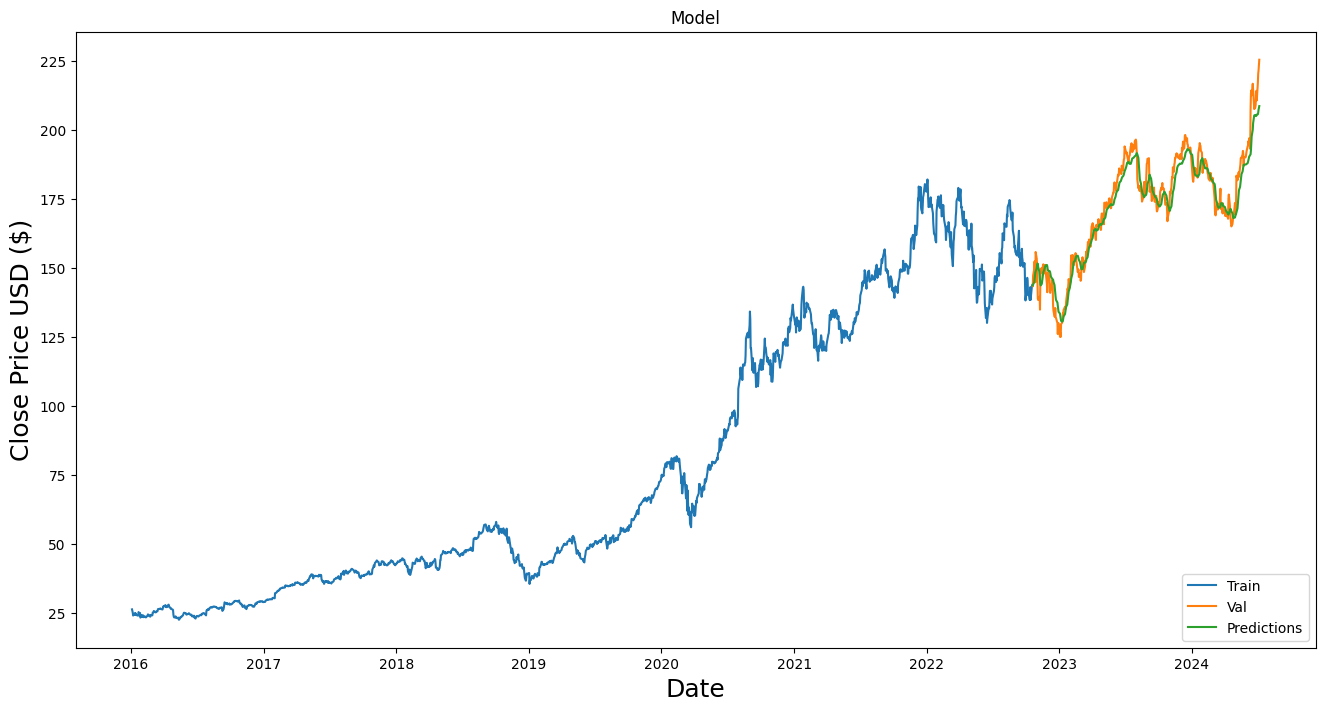

In [54]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [55]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-10-20,143.389999,143.617172
2022-10-21,147.270004,144.000778
2022-10-24,149.449997,144.735443
2022-10-25,152.339996,145.782761
2022-10-26,149.350006,147.170303
...,...,...
2024-06-28,210.619995,205.478668
2024-07-01,216.750000,205.595078
2024-07-02,220.270004,206.190979
